In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Create the inspector and connect it to the engine
# Collect the names of tables within the database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Using the inspector to print the column names and types
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Using the inspector to print the column names and types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [14]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Last_Date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(Last_Date)
# Calculate the date 1 year ago from the last data point in the database
one_year_before = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_before)
# Perform a query to retrieve the data and precipitation scores
prcp_1617 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date>='2016-08-23', Measurement.date <='2017-08-23').all()
print(prcp_1617)


('2017-08-23',)
2016-08-23
[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10

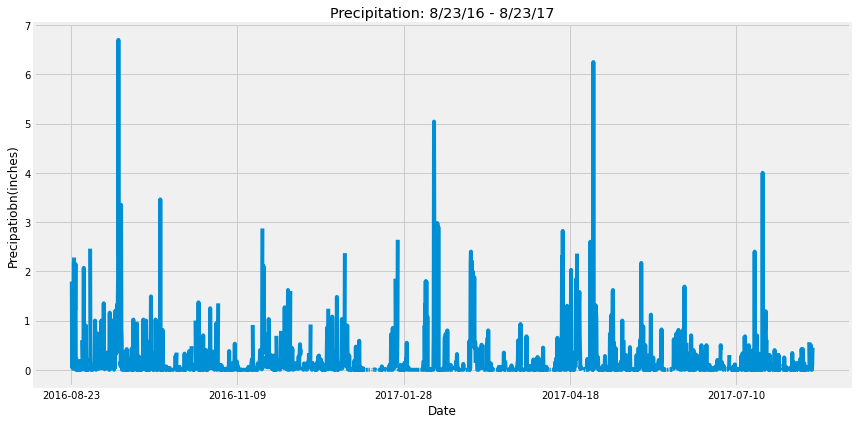

In [41]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(data = prcp_1617)
prcp_df = prcp_df.set_index('date')
# Sort the dataframe by date
prcp_df = prcp_df.sort_index(ascending=True)
prcp_df.head(20)
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(12, 6), title = "Precipitation: 8/23/16 - 8/23/17", grid = None,
            legend = False)
plt.xlabel("Date")
plt.ylabel("Precipatiobn(inches)")
plt.tight_layout()
plt.show()

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [46]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).count()
print(station_count)

9


In [47]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Active_Stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
print(Active_Stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [67]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_name = session.query(Station.name).filter(Station.station == 'USC00519281').all()
station_name = station_name[0][0]

highest_temp = session.query(Measurement.tobs).filter(Measurement.station =='USC00519281').\
                order_by(Measurement.tobs.desc()).first()
highest_temp = highest_temp[0]

lowest_temp = session.query(Measurement.tobs).filter(Measurement.station =='USC00519281').\
                order_by(Measurement.tobs.asc()).first()
lowest_temp = lowest_temp[0]

avg_temp = session.query(func.round(func.avg(Measurement.tobs),1)).filter(Measurement.station =='USC00519281').all()
avg_temp = avg_temp[0][0]

print(f"The most active station is USC00519281 : {station_name}.")
print(f"The highest temperature recorded is {highest_temp} degrees Farenheit.")
print(f"The lowest temperature recorded is {lowest_temp} degrees Farenheit.")
print(f"The average temperature is {avg_temp} degrees Farenheit.")



The most active station is USC00519281 : WAIHEE 837.5, HI US.
The highest temperature recorded is 85.0 degrees Farenheit.
The lowest temperature recorded is 54.0 degrees Farenheit.
The average temperature is 71.7 degrees Farenheit.


In [77]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp_count = session.query(Measurement.station, func.count(Measurement.tobs)).\
             group_by(Measurement.station).\
             order_by(func.count(Measurement.tobs).desc()).first()

temp_data = session.query(Measurement.date,Measurement.tobs).\
            filter(Measurement.station == 'USC00519281').\
            filter(Measurement.date >=one_year_before).all()



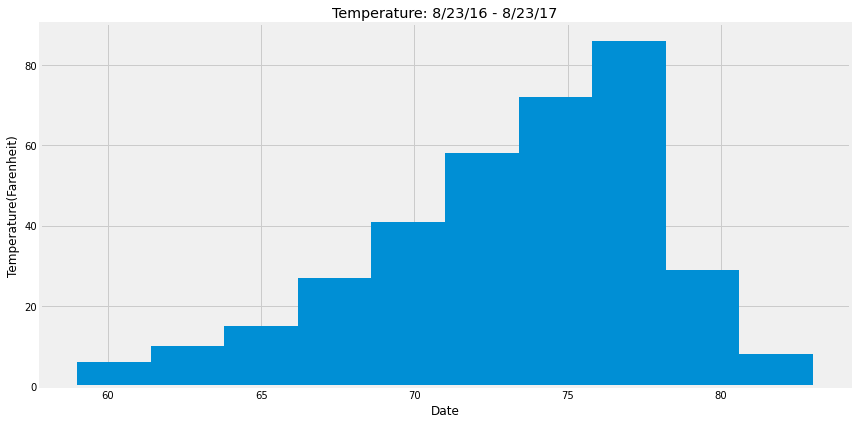

In [82]:
#convert data to pandas dataframe
temp_info = pd.DataFrame(temp_data)
temp_info.head(10)

# Set index by date
temp_info = temp_info.set_index('date')
# Sort the dataframe by date
temp_info = temp_info.sort_index(ascending=True)
temp_info.head(20)

# Use Pandas Plotting with Matplotlib to plot the data
temp_info.plot(kind="hist",figsize=(12, 6), title = "Temperature: 8/23/16 - 8/23/17", grid = None,
            legend = False)
plt.xlabel("Date")
plt.ylabel("Temperature(Farenheit)")
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [83]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start = "2017-03-08"
trip_end = "2018-03-17"

temp_combo = calc_temps(trip_start, trip_end)
temp_combo

[(58.0, 75.90070921985816, 87.0)]

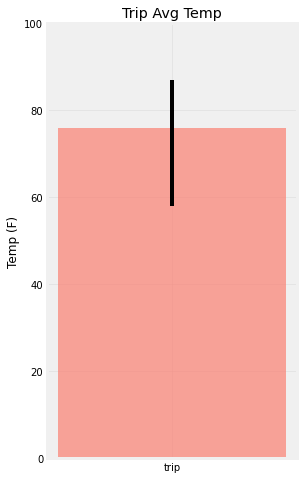

In [91]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp_min = temp_combo[0][0]
temp_max = temp_combo[0][2]
temp_avg = temp_combo[0][1]

lower = temp_avg - temp_min
upper = temp_max - temp_avg

plt.figure(figsize=(4,8))
plt.bar("trip", temp_avg, yerr = np.array([[lower],[upper]]), color = "salmon", alpha =0.7)
plt.ylim(0, 100)
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.grid(alpha=.3)

In [101]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# Aggregate all elements that are ready to be queried
sel = ([Station.station,
        Station.name,
        func.round(Station.latitude,1),
        func.round(Station.longitude,1),
        Station.elevation,
        func.round(func.sum(Measurement.prcp),1)])


Rainfall_Amt = session.query(*sel).filter(Station.station == Measurement.station).\
               filter(Measurement.date >=trip_start).\
               filter(Measurement.date <=trip_end).\
               group_by(Station.station).\
               order_by(func.sum(Measurement.prcp).desc()).all()

# Convert data into data frame
Station_Rainfall_df = pd.DataFrame(np.array(Rainfall_Amt))
Station_Rainfall_df = Station_Rainfall_df.rename(columns = {0:"Station",
                                                            1:"Name",
                                                            2:"Latitude",
                                                            3:"Longitude",
                                                            4:"Elevation",
                                                            5:"Precipitation"})

Station_Rainfall_df


,Station,Name,Latitude,Longitude,Elevation,Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3,-157.8,152.4,52.0
1,USC00519281,"WAIHEE 837.5, HI US",21.5,-157.8,32.9,30.1
2,USC00513117,"KANEOHE 838.1, HI US",21.4,-157.8,14.6,20.6
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.3,-157.7,19.5,16.4
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5,-157.8,7.0,13.9
5,USC00519397,"WAIKIKI 717.2, HI US",21.3,-157.8,3.0,3.8
6,USC00517948,"PEARL CITY, HI US",21.4,-158.0,11.9,0.2


In [109]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [114]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_begin = '2017-03-08'
trip_finish = "2018-03-17"
# Use the start and end date to create a range of dates
trip_range = ["03-08","03-09","03-10","03-11","03-12","03-13","03-14","03-15","03-16","03-17"]
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
daily_norm = []

for trip in trip_range:
    daily_trip= daily_normals(trip)
    daily_norm.append(daily_trip)

daily_norm

[[(59.0, 68.72413793103448, 78.0)],
 [(57.0, 68.56140350877193, 75.0)],
 [(57.0, 69.12280701754386, 75.0)],
 [(60.0, 69.89285714285714, 82.0)],
 [(62.0, 69.88888888888889, 80.0)],
 [(56.0, 69.29629629629629, 77.0)],
 [(62.0, 70.32758620689656, 77.0)],
 [(58.0, 68.54716981132076, 76.0)],
 [(60.0, 69.70370370370371, 78.0)],
 [(57.0, 68.54, 75.0)]]

In [122]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_norm_update = [np.array(row[0]) for row in daily_norm]

# convert data into data frame
daily_df = pd.DataFrame(daily_norm_update)

#add column Date
daily_df['Date'] = trip_range

# set 'Date' as index
daily_df = daily_df.set_index('Date')

# rename columns
daily_df = daily_df.rename(columns={0: "Low Temp", 1: "Avg Temp", 2: "High Temp"})

daily_df.head(10)


,Low Temp,Avg Temp,High Temp
Date,,,
03-08,59.0,68.724138,78.0
03-09,57.0,68.561404,75.0
03-10,57.0,69.122807,75.0
03-11,60.0,69.892857,82.0
03-12,62.0,69.888889,80.0
03-13,56.0,69.296296,77.0
03-14,62.0,70.327586,77.0
03-15,58.0,68.547170,76.0
03-16,60.0,69.703704,78.0


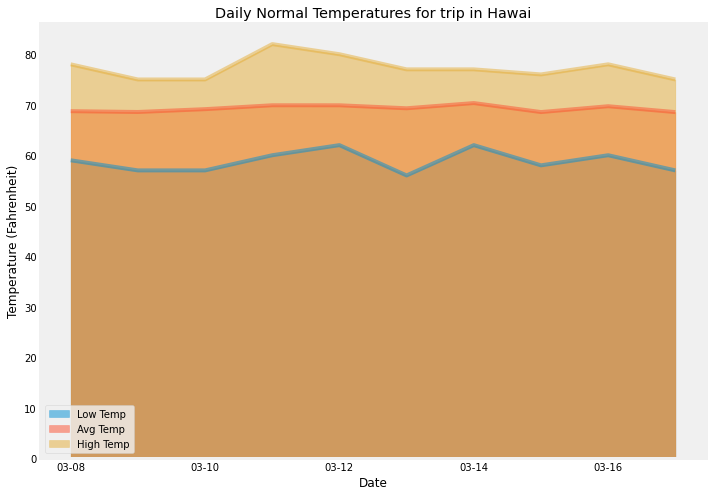

In [129]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(figsize = (10, 7))

daily_df.plot.area(ax=ax,stacked=False)

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (Fahrenheit)')
ax.set_title('Daily Normal Temperatures for trip in Hawai')

plt.grid()
plt.tight_layout()
plt.show()